<a href="https://colab.research.google.com/github/vrlnarayana/capstone-gl/blob/main/Feature_Engineering_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project : Group 4 : Data Processing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import files
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format   

plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

# Fetching the Metadata
The Million Song Dataset is a freely-available collection of audio features and metadata for a million contemporary popular music tracks. The dataset is the result of a collaboration between The Echo Nest and LabROSA at Columbia University, supported in part by the NSF.

Within this dataset there are several subsets of data. The original data set is augmented with track metadata extract in SQLite3 format. The following is the  download it from Columbia University's Servers - http://labrosa.ee.columbia.edu/millionsong/sites/default/files/AdditionalFiles/track_metadata.db

The file song_augmented_location.csv is a result of join between two datasets

In [4]:
song_data_df =pd.read_csv(r'/content/drive/My Drive/songs_augmented_location.csv')

In [5]:
song_data_df.head(2)

,song_id,title,release,artist_name,year,track_id,artist_id,artist_mbid,duration,artist_familiarity,artist_hotttnesss,track_7digitalid,shs_perf,shs_work,lat,long,location,country_code,country_name
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,TRMMMYQ128F932D901,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,252.06,0.65,0.39,7032331,-1,0,nan,nan,NaN,NaN,NaN
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,TRMMMKD128F425225D,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,156.55,0.44,0.36,1514808,-1,0,nan,nan,NaN,NaN,NaN


Additional "Genre" data is in the data set located at - http://www.ifs.tuwien.ac.at/mir/msd/partitions/msd-MAGD-genreAssignment.cls


In [6]:
track_genres_df = pd.read_table(r'/content/drive/My Drive/msd-MAGD-genreAssignment.cls',names=['track_id', 'genre'],sep='\t')

In [7]:
track_genres_df.head(5)

,track_id,genre
0,TRAAAAK128F9318786,Pop_Rock
1,TRAAAAV128F421A322,Pop_Rock
2,TRAAAAW128F429D538,Rap
3,TRAAABD128F429CF47,Pop_Rock
4,TRAAACV128F423E09E,Pop_Rock


There are only 422,714 i.e. around 42% tracks with Genre data. let's join it with Song data table

In [8]:
song_data_with_genre_df = pd.merge(song_data_df, track_genres_df, on="track_id", how="left")

In [9]:
song_data_with_genre_df

,song_id,title,release,artist_name,year,track_id,artist_id,artist_mbid,duration,artist_familiarity,artist_hotttnesss,track_7digitalid,shs_perf,shs_work,lat,long,location,country_code,country_name,genre
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,TRMMMYQ128F932D901,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,252.06,0.65,0.39,7032331,-1,0,nan,nan,NaN,NaN,NaN,NaN
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,TRMMMKD128F425225D,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,156.55,0.44,0.36,1514808,-1,0,nan,nan,NaN,NaN,NaN,NaN
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,TRMMMRX128F93187D9,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,138.97,0.64,0.44,6945353,-1,0,55.86,-4.24,"Glasgow, Scotland",gb,United Kingdom,Electronic
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,TRMMMCH128F425532C,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,145.06,0.45,0.37,2168257,-1,0,nan,nan,NaN,NaN,NaN,International
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,TRMMMWA128F426B589,AREQDTE1269FB37231,NaN,514.30,0.00,0.00,2264873,-1,0,nan,nan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0,TRYYYUS12903CD2DF0,AR7Z4J81187FB3FC59,9d50cb20-7e42-45cc-b0dd-154c3e92a577,217.44,0.53,0.41,7522478,-1,0,nan,nan,NaN,NaN,NaN,NaN
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0,TRYYYJO128F426DA37,ART5FZD1187B9A7FCF,2357c400-9109-42b6-b3fe-9e2d9f8e3872,244.17,0.40,0.37,1632096,-1,0,nan,nan,NaN,NaN,NaN,NaN
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0,TRYYYMG128F4260ECA,ARZ3R6M1187B9AF750,8b97e9c8-61f5-4615-9a96-276f24204e34,553.04,0.56,0.34,2219291,-1,0,nan,nan,NaN,NaN,NaN,NaN
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0,TRYYYDJ128F9310A21,ARCMCOK1187B9B1073,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,484.52,0.40,0.26,5472456,-1,0,nan,nan,NaN,NaN,NaN,NaN


In [10]:
song_duration_year_df = song_data_with_genre_df[['year','duration']].groupby('year').mean().reset_index().sort_values(by='year')

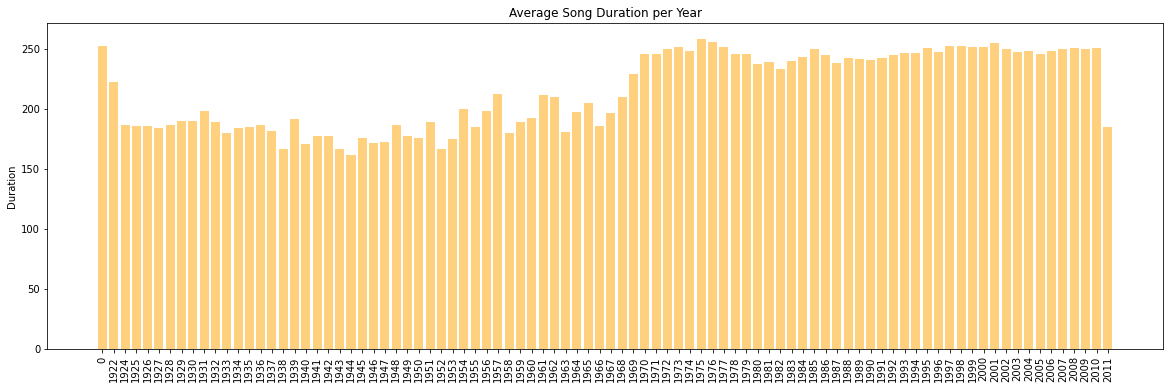

In [11]:
objects = (list(song_duration_year_df['year']))
y_pos = np.arange(len(objects))
duration = list(song_duration_year_df['duration'])
 
plt.bar(y_pos, duration, align='center', alpha=0.5,color='orange')
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Duration')
plt.title('Average Song Duration per Year')
 
plt.show()

After 1971, the song duration is on average 250 seconds.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda98d9edd8>]],
      dtype=object)

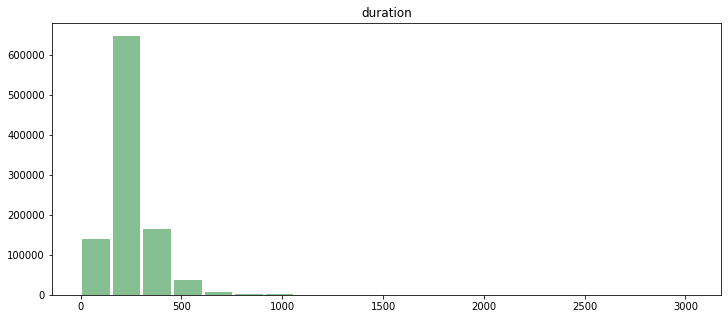

In [12]:
song_data_with_genre_df.hist(column='duration',bins=20, grid=False, figsize=(12,5), color='#86bf91', zorder=2, rwidth=0.9)


Most of the songs have durtaion from 200 sec to 300 sec. but there are very few songs with duration of 3000 seconds i.e. 5 min

In [13]:
long_duration_songs_top_20 = song_data_with_genre_df.sort_values(by='duration', ascending=False).head(30)

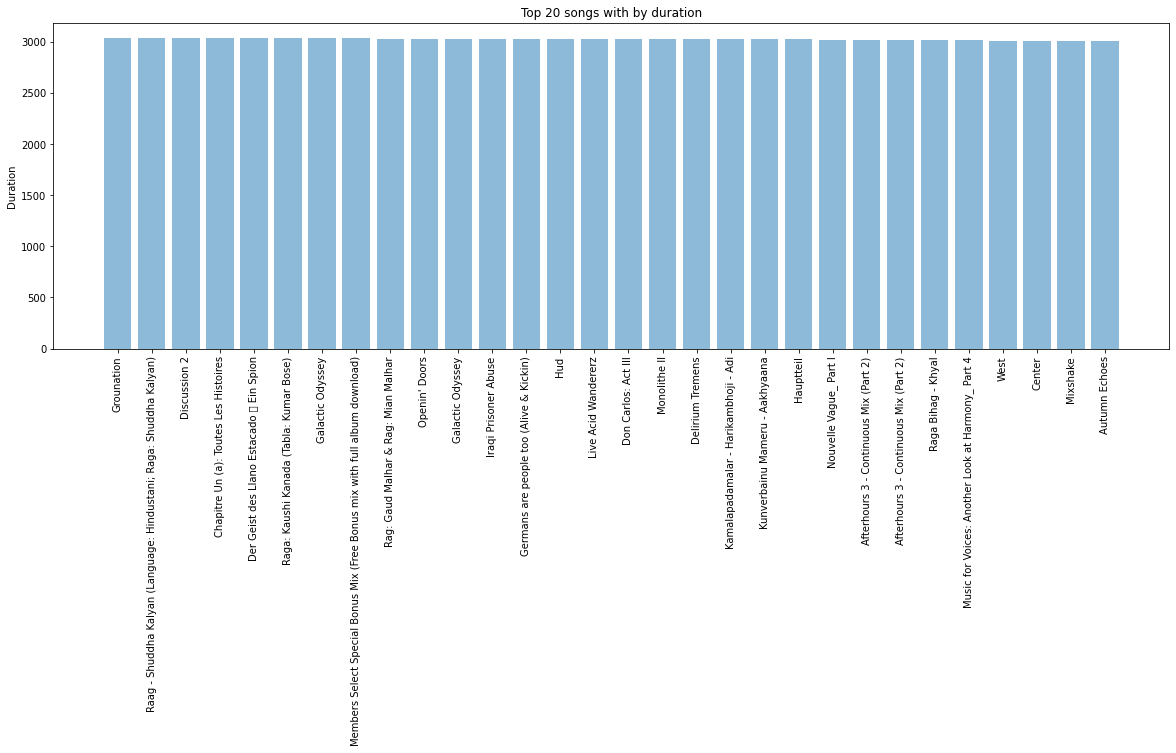

In [14]:
objects = (list(long_duration_songs_top_20['title']))
y_pos = np.arange(len(objects))
duration = list(long_duration_songs_top_20['duration'])
 
plt.bar(y_pos, duration, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Duration')
plt.title('Top 20 songs with by duration')
 
plt.show()

You can also notice 3 Indian Raga songs in top 20 long duration songs

In [15]:
country_song_data = song_data_with_genre_df.groupby(by="country_name").count()['country_code'].sort_values(ascending=False).reset_index()
top_20_sog_countries = country_song_data.head(20)

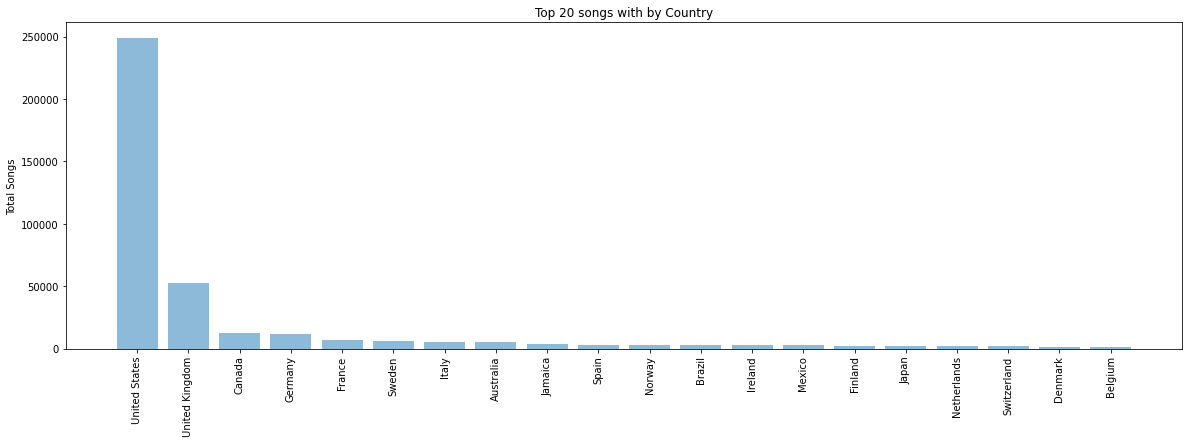

In [16]:
objects = (list(top_20_sog_countries['country_name']))
y_pos = np.arange(len(objects))
duration = list(top_20_sog_countries['country_code'])
 
plt.bar(y_pos, duration, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Total Songs')
plt.title('Top 20 songs with by Country')
 
plt.show()

US has contributed more to million songs database followed by UK annd Canada

In [17]:
!pip install geopandas

     |████████████████████████████████| 972kB 7.9MB/s 
     |████████████████████████████████| 6.5MB 27.9MB/s 
     |████████████████████████████████| 14.8MB 318kB/s 


In [18]:
artist_location = song_data_with_genre_df[song_data_with_genre_df['lat'].notna()]
artist_location.columns


Index(['song_id', 'title', 'release', 'artist_name', 'year', 'track_id',
       'artist_id', 'artist_mbid', 'duration', 'artist_familiarity',
       'artist_hotttnesss', 'track_7digitalid', 'shs_perf', 'shs_work', 'lat',
       'long', 'location', 'country_code', 'country_name', 'genre'],
      dtype='object')

In [19]:
import geopandas
gdf = geopandas.GeoDataFrame(
    artist_location, geometry=geopandas.points_from_xy(artist_location['long'], artist_location['lat']))

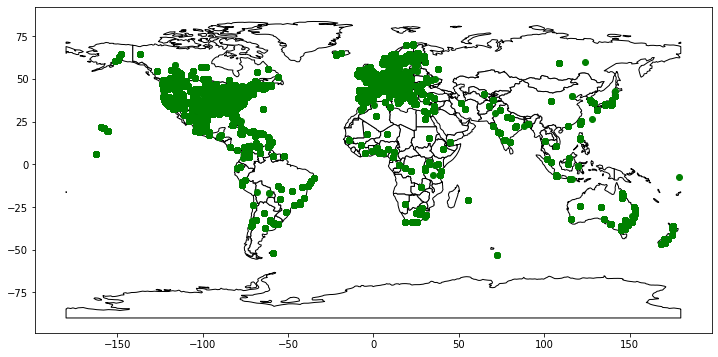

In [20]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='green',figsize=(8, 4))

plt.show()

The data set contains data from around the world

In [21]:
song_data_with_genre_df.columns

Index(['song_id', 'title', 'release', 'artist_name', 'year', 'track_id',
       'artist_id', 'artist_mbid', 'duration', 'artist_familiarity',
       'artist_hotttnesss', 'track_7digitalid', 'shs_perf', 'shs_work', 'lat',
       'long', 'location', 'country_code', 'country_name', 'genre'],
      dtype='object')

##Data Dictionary


| Column Namee      | Description |
| ----------- | ----------- |
| song_id      | The Echo Nest song ID, note that a song can be associated with many tracks|
| title   | song title        |
| release | album name from which the track was taken, some songs / tracks can come from many albums, only one is given |
| artist_name | artist name      |
| year        | year when the song was released, according to musicbrainz.org        | 
| track_id   | unique ID for each track |
| artist_id. | the musicbrainz.org ID for the artist       |
| artist_mbid | artist's MusicBrainz Identifier         |
| duration.   | duration of the track in seconds      |
| artist_familiarity | An indication of how well known the artist is. Top familiar artists are bands like Led Zeppelin, Coldplay, and The Beatles.       |
| artist_hotttnesss | according to The Echo Nest, artist 'hotttnesss' (on a scale of 0 and 1) is an indication of how much buzz the artist was getting at the time of download. top <e2><80><98>hottt<e2><80><99> artists are artists like Katy Perry, The Boy Least Likely to, and Mastodon.         |
| track_7digitalid |  Track's 7 digital ID     |
|.lat.  | Latitude associated with the artist location.   |
| long. | Longitude associated with the artist location   |
| location.| city, and where available state or country associated with the artist location.   |
| genre   | Song's genre  |
| country_code | country code where the song was recorded |
| country_name | Name of the country where the song was recorded |



In [22]:
song_data_with_genre_df.to_pickle(r'/content/drive/My Drive/song_data_augmented_all_records.pkl')

In [23]:
song_data_with_genre_df

,song_id,title,release,artist_name,year,track_id,artist_id,artist_mbid,duration,artist_familiarity,artist_hotttnesss,track_7digitalid,shs_perf,shs_work,lat,long,location,country_code,country_name,genre
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,TRMMMYQ128F932D901,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,252.06,0.65,0.39,7032331,-1,0,nan,nan,NaN,NaN,NaN,NaN
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,TRMMMKD128F425225D,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,156.55,0.44,0.36,1514808,-1,0,nan,nan,NaN,NaN,NaN,NaN
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,TRMMMRX128F93187D9,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,138.97,0.64,0.44,6945353,-1,0,55.86,-4.24,"Glasgow, Scotland",gb,United Kingdom,Electronic
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,TRMMMCH128F425532C,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,145.06,0.45,0.37,2168257,-1,0,nan,nan,NaN,NaN,NaN,International
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,TRMMMWA128F426B589,AREQDTE1269FB37231,NaN,514.30,0.00,0.00,2264873,-1,0,nan,nan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0,TRYYYUS12903CD2DF0,AR7Z4J81187FB3FC59,9d50cb20-7e42-45cc-b0dd-154c3e92a577,217.44,0.53,0.41,7522478,-1,0,nan,nan,NaN,NaN,NaN,NaN
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0,TRYYYJO128F426DA37,ART5FZD1187B9A7FCF,2357c400-9109-42b6-b3fe-9e2d9f8e3872,244.17,0.40,0.37,1632096,-1,0,nan,nan,NaN,NaN,NaN,NaN
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0,TRYYYMG128F4260ECA,ARZ3R6M1187B9AF750,8b97e9c8-61f5-4615-9a96-276f24204e34,553.04,0.56,0.34,2219291,-1,0,nan,nan,NaN,NaN,NaN,NaN
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0,TRYYYDJ128F9310A21,ARCMCOK1187B9B1073,4ac5f3de-c5ad-475e-ad50-41f1ef9dba20,484.52,0.40,0.26,5472456,-1,0,nan,nan,NaN,NaN,NaN,NaN


## Clean the Song Dataset for model processing

In [24]:
song_data_with_genre_df.duplicated(subset=['track_id']).value_counts()

False    999056
True        944
dtype: int64

### There are 944 duplicate records in the Song database

In [25]:
song_data_with_genre_df = song_data_with_genre_df.drop_duplicates(subset=['track_id'])

### Remove the records which do not have "Genre"

In [26]:
song_data_with_genre_df = song_data_with_genre_df[song_data_with_genre_df['genre'].notna()]

In [27]:
len(song_data_with_genre_df)

422140

### Around 422,140 records have "Genre". Now delete the records which do ot have "Lat and Longitude data

In [28]:
song_data_with_genre_df = song_data_with_genre_df[song_data_with_genre_df['lat'].notna()]

In [29]:
len(song_data_with_genre_df)

177304

### Total records in the final set are 177304. Let's remove unnecessary columns 


1.   track_7digitalid
2.   shs_perf
3.   she_work
4.   artist_mib




In [30]:
song_data_with_genre_df.columns

Index(['song_id', 'title', 'release', 'artist_name', 'year', 'track_id',
       'artist_id', 'artist_mbid', 'duration', 'artist_familiarity',
       'artist_hotttnesss', 'track_7digitalid', 'shs_perf', 'shs_work', 'lat',
       'long', 'location', 'country_code', 'country_name', 'genre'],
      dtype='object')

In [31]:
song_data_with_genre_df.drop(columns=['track_7digitalid','artist_mbid','shs_perf','shs_work'],inplace=True)

In [32]:
song_data_with_genre_df.columns

Index(['song_id', 'title', 'release', 'artist_name', 'year', 'track_id',
       'artist_id', 'duration', 'artist_familiarity', 'artist_hotttnesss',
       'lat', 'long', 'location', 'country_code', 'country_name', 'genre'],
      dtype='object')

### Fix column types

In [34]:
song_data_with_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177304 entries, 2 to 999983
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   song_id             177304 non-null  object 
 1   title               177304 non-null  object 
 2   release             177304 non-null  object 
 3   artist_name         177304 non-null  object 
 4   year                177304 non-null  int64  
 5   track_id            177304 non-null  object 
 6   artist_id           177304 non-null  object 
 7   duration            177304 non-null  float64
 8   artist_familiarity  177304 non-null  float64
 9   artist_hotttnesss   177304 non-null  float64
 10  lat                 177304 non-null  float64
 11  long                177304 non-null  float64
 12  location            177293 non-null  object 
 13  country_code        177216 non-null  object 
 14  country_name        177216 non-null  object 
 15  genre               177304 non-nul

In [35]:
song_data_with_genre_df['song_id'] = song_data_with_genre_df['song_id'].astype('string')

In [36]:
song_data_with_genre_df['title'] = song_data_with_genre_df['title'].astype('string')

In [37]:
song_data_with_genre_df['release'] = song_data_with_genre_df['release'].astype('string')

In [38]:
song_data_with_genre_df['artist_name'] = song_data_with_genre_df['artist_name'].astype('string')

In [39]:
song_data_with_genre_df['track_id'] = song_data_with_genre_df['track_id'].astype('string')

In [40]:
song_data_with_genre_df['artist_id'] = song_data_with_genre_df['artist_id'].astype('string')

In [41]:
song_data_with_genre_df['location'] = song_data_with_genre_df['location'].astype('string')

In [42]:
song_data_with_genre_df['country_code'] = song_data_with_genre_df['country_code'].astype('string')

In [43]:
song_data_with_genre_df['country_name'] = song_data_with_genre_df['country_name'].astype('string')

In [44]:
song_data_with_genre_df['genre'] = song_data_with_genre_df['genre'].astype('string')

In [45]:
song_data_with_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177304 entries, 2 to 999983
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   song_id             177304 non-null  string 
 1   title               177304 non-null  string 
 2   release             177304 non-null  string 
 3   artist_name         177304 non-null  string 
 4   year                177304 non-null  int64  
 5   track_id            177304 non-null  string 
 6   artist_id           177304 non-null  string 
 7   duration            177304 non-null  float64
 8   artist_familiarity  177304 non-null  float64
 9   artist_hotttnesss   177304 non-null  float64
 10  lat                 177304 non-null  float64
 11  long                177304 non-null  float64
 12  location            177293 non-null  string 
 13  country_code        177216 non-null  string 
 14  country_name        177216 non-null  string 
 15  genre               177304 non-nul

### Save the copy of the dataset in a pickle file

In [48]:
len(song_data_with_genre_df)

177304

In [46]:
song_data_with_genre_df.to_pickle(r'/content/drive/My Drive/song_data_cleaned_records.pkl')

## Add lyrics BoW to songs dataset

READ Bags of words, extracting them from the train dataset

In [47]:
#import file
lyrics = pd.read_table(r'/content/drive/My Drive/mxm_dataset_train.txt', error_bad_lines=False)

#change name of the column
lyrics.columns = ['Raw_Training']

# take the bag of word to use it later
words_train = lyrics.iloc[16]

#drop useless rows
lyrics=lyrics[17:].copy()

# get TrackID, MxMID and lyrics and put them separated columns
def sortdata(x):
    splitted = x['Raw_Training'].split(',')
    x['Tid']=splitted[0]
    #x['MXM_Tid']=splitted[1]
    x['words_freq']=splitted[2:]
    return x

#Apply the function to every column
lyrics = lyrics.apply(sortdata,axis=1)
lyrics = lyrics[['Tid','words_freq']]

In [49]:
lyrics

,Tid,words_freq
17,TRAAAAV128F421A322,"[1:6, 2:4, 3:2, 4:2, 5:5, 6:3, 7:1, 8:1, 11:1,..."
18,TRAAABD128F429CF47,"[1:10, 3:17, 4:8, 5:2, 6:2, 7:1, 8:3, 9:2, 10:..."
19,TRAAAED128E0783FAB,"[1:28, 2:15, 3:2, 4:12, 5:22, 6:2, 7:2, 8:4, 9..."
20,TRAAAEF128F4273421,"[1:5, 2:4, 3:3, 4:2, 5:1, 6:11, 9:4, 12:9, 13:..."
21,TRAAAEW128F42930C0,"[1:4, 4:5, 5:7, 6:2, 7:4, 9:1, 10:1, 11:9, 15:..."
...,...,...
210531,TRZZZWS128F429CF87,"[6:1, 24:9, 38:7, 42:1, 77:4, 90:1, 112:5, 114..."
210532,TRZZZXA128F428ED56,"[1:1, 2:13, 3:6, 4:5, 5:4, 6:6, 9:4, 10:4, 12:..."
210533,TRZZZXV128F4289747,"[1:13, 2:3, 3:17, 4:5, 5:9, 7:8, 8:2, 9:1, 11:..."
210534,TRZZZYV128F92E996D,"[1:10, 2:6, 3:20, 5:2, 7:30, 8:1, 9:6, 10:3, 1..."


In [50]:
len(lyrics['Tid'].unique())

210519

#### There are no duplicate records in lyrics dataset

In [51]:
song_data_with_bow_df =pd.merge(song_data_with_genre_df,lyrics,left_on='track_id', right_on='Tid',how='left')

In [52]:
song_data_with_bow_df

,song_id,title,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,country_code,country_name,genre,Tid,words_freq
0,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,TRMMMRX128F93187D9,ARGEKB01187FB50750,138.97,0.64,0.44,55.86,-4.24,"Glasgow, Scotland",gb,United Kingdom,Electronic,NaN,NaN
1,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993,TRMMMBB12903CB7D21,AR3Z9WY1187FB4CDC2,221.20,0.59,0.40,38.90,-77.03,Washington DC,us,United States,Rap,NaN,NaN
2,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",us,United States,Pop_Rock,TRMMMUT128F42646E8,"[2:36, 3:25, 4:2, 5:8, 6:2, 7:1, 8:6, 10:8, 12..."
3,SOKOVRQ12A8C142811,Ethos of Coercion,Descend Into Depravity,Dying Fetus,2009,TRMMMQY128F92F0EA3,ARGWPP11187B9AEF43,196.02,0.73,0.51,38.82,-75.92,Maryland,us,United States,Pop_Rock,NaN,NaN
4,SOYNOIK12A6D4F7F3F,All For A Purpose (Speak Life Album Version),Speak Life,Sev Statik,0,TRMMMWA128F1462C8C,ARPMCDB1187FB4B5D2,236.04,0.50,0.34,40.71,-74.01,New York,us,United States,Rap,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177299,SOXAXCJ12AB017F02A,Gaze,When You Feel the Love,Rodney Jones,0,TRYYYJB128F930A811,ARU20IJ1187B9901D9,364.25,0.48,0.34,41.31,-72.92,"New Haven, CT",us,United States,Jazz,NaN,NaN
177300,SOMOWRE12A81C2348C,Are You Ready? (Album Version),Now I See,Tata Vega,0,TRYYYWY128F4238934,AR1TQH71187B994258,181.58,0.52,0.31,40.70,-73.83,"Queens, NY",us,United States,RnB,NaN,NaN
177301,SOALVIX12AB01885A1,Major Pain & Mr. Bossalini (Feat. Spice 1),Til My Casket Drops,C-Bo,0,TRYYYST128F93223E1,ARI08MT1187FB57312,270.37,0.61,0.45,37.27,-119.27,California,us,United States,Rap,TRYYYST128F93223E1,"[1:23, 2:19, 3:5, 4:11, 6:13, 7:8, 8:5, 9:6, 1..."
177302,SOJYTFC12A6D4FD812,Deliverance,Rock Love,Steve Miller Band,1971,TRYYYJZ128F424BFA1,ARNLVQB1187B9AEAB0,561.19,0.77,0.55,36.61,-86.44,Swingtown,us,United States,Pop_Rock,NaN,NaN


In [54]:
song_data_with_bow_clean_df = song_data_with_bow_df[song_data_with_bow_df['Tid'].notna()]

In [58]:
song_data_with_bow_clean_df.drop(columns=['Tid'],inplace=True)

In [59]:
song_data_with_bow_clean_df.head(5)

,song_id,title,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,country_code,country_name,genre,words_freq
2,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",us,United States,Pop_Rock,"[2:36, 3:25, 4:2, 5:8, 6:2, 7:1, 8:6, 10:8, 12..."
5,SOOLRHW12A8C142643,All of the same blood,Violent revolution,Kreator,2001,TRMMMKQ128F92EBCB5,AR79L0D1187FB3AFB6,372.43,0.74,0.47,51.45,7.01,Essen,de,Germany,Pop_Rock,"[2:12, 3:2, 4:3, 5:4, 10:2, 12:1, 13:9, 15:2, ..."
12,SOVOIOQ12AC4688FAC,The Rest of the Night,The Wind,Warren Zevon,2003,TRMMWNY12903CF28D2,ARUQFUJ1187FB42AEC,279.30,0.69,0.47,41.88,-87.63,"Chicago, IL",us,United States,Pop_Rock,"[1:1, 2:31, 3:2, 4:1, 5:2, 6:1, 7:4, 8:2, 10:1..."
17,SOGXPYA12A58A769A7,Rock Can't Last Forever (You Hate Me Hate Mus...,You Make Me Hate Music,Fine China,2002,TRMMGDQ128F4277AE7,AR6KJQA1187FB3EF30,295.94,0.49,0.36,33.45,-112.08,"Phoenix, Arizona",us,United States,Pop_Rock,"[1:5, 2:1, 3:4, 4:5, 5:6, 6:3, 7:2, 8:3, 9:3, ..."
32,SOWSOVJ12A8C13A8C1,Zuviel Hitze,Einzelhaft,Falco,1982,TRMMHVN128F428E67E,AR5DXUU1187B9B0E42,274.02,0.67,0.46,48.20,16.37,"Vienna, Austria",at,Austria,Pop_Rock,"[3:1, 10:5, 14:1, 20:1, 28:2, 32:1, 33:1, 73:1..."


###From generic bags of words to lyrics

In [60]:
#get the word data
bag_of_words = words_train
# clean the data and split it to create a list of 5000 words
bag_of_words = bag_of_words.str.replace('%','')
bag_of_words = bag_of_words.str.split(',')

display(bag_of_words.head())


Raw_Training    [i, the, you, to, and, a, me, it, not, in, my,...
Name: 16, dtype: object

In [61]:
#Defining a function
def create_text(words_freq):
    #create the final list of all words
    list_words=''
    #iterate over every id of words
    for compteur in words_freq:
        
        word = bag_of_words[0][int(compteur.split(':')[0])-1]
        times = int(compteur.split(':')[1])
        
        #Separating every word with a space to be able to work on it with librairies during part 2
        for i in range(times):
            list_words += ' ' + word + ' '
    return list_words

In [62]:
print(create_text(lyrics.iloc[0]['words_freq']))

 i  i  i  i  i  i  the  the  the  the  you  you  to  to  and  and  and  and  and  a  a  a  me  it  my  is  is  of  of  of  your  that  are  are  we  we  am  am  will  will  for  for  for  for  be  have  have  so  this  like  like  de  up  was  was  if  got  would  been  these  these  seem  someon  understand  pass  river  met  piec  damn  worth  flesh  grace  poor  poor  somehow  ignor  passion  tide  season  seed  resist  order  order  piti  fashion  grant  captur  captur  ici  soil  patienc  social  social  highest  highest  slice  leaf  lifeless  arrang  wilder  shark  devast  element 


In [63]:
song_data_with_bow_clean_df['lyrics_text'] = song_data_with_bow_clean_df['words_freq'].apply(create_text)

In [65]:
song_data_with_bow_clean_df.drop(columns=['words_freq'],inplace=True)

In [69]:
song_data_with_bow_clean_df.head()

,song_id,title,release,artist_name,year,track_id,artist_id,duration,artist_familiarity,artist_hotttnesss,lat,long,location,country_code,country_name,genre,lyrics_text
2,SOBARPM12A8C133DFF,(Looking For) The Heart Of Saturday,Cover Girl,Shawn Colvin,1994,TRMMMUT128F42646E8,ARDW5AW1187FB55708,216.48,0.69,0.45,42.79,-96.93,"Vermillion, SD",us,United States,Pop_Rock,the the the the the the the the the ...
5,SOOLRHW12A8C142643,All of the same blood,Violent revolution,Kreator,2001,TRMMMKQ128F92EBCB5,AR79L0D1187FB3AFB6,372.43,0.74,0.47,51.45,7.01,Essen,de,Germany,Pop_Rock,the the the the the the the the the ...
12,SOVOIOQ12AC4688FAC,The Rest of the Night,The Wind,Warren Zevon,2003,TRMMWNY12903CF28D2,ARUQFUJ1187FB42AEC,279.30,0.69,0.47,41.88,-87.63,"Chicago, IL",us,United States,Pop_Rock,i the the the the the the the the th...
17,SOGXPYA12A58A769A7,Rock Can't Last Forever (You Hate Me Hate Mus...,You Make Me Hate Music,Fine China,2002,TRMMGDQ128F4277AE7,AR6KJQA1187FB3EF30,295.94,0.49,0.36,33.45,-112.08,"Phoenix, Arizona",us,United States,Pop_Rock,i i i i i the you you you you to t...
32,SOWSOVJ12A8C13A8C1,Zuviel Hitze,Einzelhaft,Falco,1982,TRMMHVN128F428E67E,AR5DXUU1187B9B0E42,274.02,0.67,0.46,48.20,16.37,"Vienna, Austria",at,Austria,Pop_Rock,you in in in in in your am so so wi...


In [78]:
song_data_with_bow_clean_df.isna().sum()

song_id                0
title                  0
release                0
artist_name            0
year                   0
track_id               0
artist_id              0
duration               0
artist_familiarity     0
artist_hotttnesss      0
lat                    0
long                   0
location               0
country_code          12
country_name          12
genre                  0
lyrics_text            0
dtype: int64

In [79]:
song_data_with_bow_clean_df = song_data_with_bow_clean_df[song_data_with_bow_clean_df['country_code'].notna()]

In [80]:
song_data_with_bow_clean_df.isna().sum()

song_id               0
title                 0
release               0
artist_name           0
year                  0
track_id              0
artist_id             0
duration              0
artist_familiarity    0
artist_hotttnesss     0
lat                   0
long                  0
location              0
country_code          0
country_name          0
genre                 0
lyrics_text           0
dtype: int64

In [82]:
song_data_with_bow_clean_df['lyrics_text'] = song_data_with_bow_clean_df['lyrics_text'].astype('string')

In [83]:
song_data_with_bow_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50113 entries, 2 to 177301
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             50113 non-null  string 
 1   title               50113 non-null  string 
 2   release             50113 non-null  string 
 3   artist_name         50113 non-null  string 
 4   year                50113 non-null  int64  
 5   track_id            50113 non-null  object 
 6   artist_id           50113 non-null  string 
 7   duration            50113 non-null  float64
 8   artist_familiarity  50113 non-null  float64
 9   artist_hotttnesss   50113 non-null  float64
 10  lat                 50113 non-null  float64
 11  long                50113 non-null  float64
 12  location            50113 non-null  string 
 13  country_code        50113 non-null  string 
 14  country_name        50113 non-null  string 
 15  genre               50113 non-null  string 
 16  lyr

In [84]:
len(song_data_with_bow_clean_df)

50113

In [85]:
song_data_with_bow_clean_df.to_pickle(r'/content/drive/My Drive/song_data_with_lyrics.pkl')